In [1]:
from pyts.image import GramianAngularField as gaf
from pyts.image import MarkovTransitionField as mtf
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.colors as mcolor
from scipy import signal
%matplotlib inline
'''school
_path = "C:\\Users\\Milk\\Documents\\Python Scripts\\pyts\\power data\\"
_imgpath="C:\\Users\\Milk\\Desktop\\研究所\\雷射計畫\\雷射實驗資料\\0529\\5x\\"
'''
_path = './power data/'
_imgpath ='./laser_img/'
list_csv=os.listdir(_path)
list_csv.sort(key= lambda x : tuple(map(int,x[:-4].split("-"))))
list_img=os.listdir(_imgpath)
list_img.sort(key= lambda x : tuple(map(int,x[:-4].split("-"))))

In [ ]:


for n in list_csv:

    csvpath=_path+n
    name = n.split(("."))
    x=np.loadtxt(open(csvpath,"rb"),delimiter=",",skiprows=0).T

    b,a = signal.butter(8,0.2,'lowpass')
    filtedData= signal.filtfilt(b,a,x)

    X=filtedData[0:]
    X=X.reshape(1,-1)

    #MTF
    MTF = mtf(image_size= X.shape[1])
    X_MTF = MTF.fit_transform(X)
    plt.imshow(X_MTF[0],cmap="CMRmap",origin="lower",norm=mcolor.Normalize(-1,1))

    #GASF
    #gasf = gaf(image_size=X.shape[1],method='summation')
    #X_gasf = gasf.fit_transform(X)
    #plt.imshow(X_gasf[0],cmap="CMRmap",origin="lower",norm=mcolor.Normalize(-1,1))

    plt.axis('off')
    plt.savefig("./laser_pyts/1218_MTF_filter/"+name[0],   # 儲存圖檔
            bbox_inches='tight', # 去除座標軸占用的空間
            pad_inches=0.0)      # 去除所有白邊
    plt.close()

(850, 850) (1, 850) (850,)


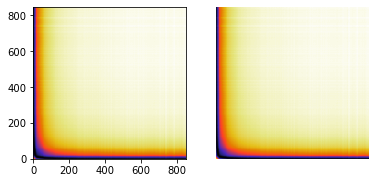

In [9]:
#ctrl+Q show documentation

import numpy as np
import matplotlib.colors as mcolor
import scipy.signal as signal

x=np.loadtxt(open(_path+list_csv[0],"rb"),delimiter=",",skiprows=0).T

# 高通濾波器 去除低頻率
b,a = signal.butter(8,0.2,'lowpass')
filtedData = signal.filtfilt(b,a,x)
'''
# fourier transform
filtedData = np.fft.fft(x)
freq = np.fft.fftfreq(x.shape[-1])
'''
#X=x[0:]
X=filtedData[0:]
X=X.reshape(1,-1)
gasf = gaf(image_size=X.shape[1],method='summation')
X_gasf = gasf.fit_transform(X)
print(X_gasf[0].shape , X.shape, filtedData.shape)
#plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(X_gasf[0],cmap="CMRmap",origin="lower",norm=mcolor.Normalize(-1,1))
plt.subplot(122)
plt.imshow(X_gasf[0],cmap="CMRmap",origin="lower")
plt.axis('off')
name = list_csv[0].split('.')
"""
plt.savefig(".\\t\\"+name[0],   # 儲存圖檔
            bbox_inches='tight', # 去除座標軸占用的空間
            pad_inches=0.0)    # 去除所有白邊
"""
plt.show()
#plt.close()

In [108]:
list_csv.sort(key=lambda x:tuple(map(int,(x[:-4].split("-")))))
print(list_csv)

['1-1.csv', '1-2.csv', '1-3.csv', '1-4.csv', '1-5.csv', '1-6.csv', '1-7.csv', '1-8.csv', '1-9.csv', '1-10.csv', '2-1.csv', '2-2.csv', '2-3.csv', '2-4.csv', '2-5.csv', '2-6.csv', '2-7.csv', '2-8.csv', '2-9.csv', '2-10.csv', '3-1.csv', '3-2.csv', '3-3.csv', '3-4.csv', '3-5.csv', '3-6.csv', '3-7.csv', '3-8.csv', '3-9.csv', '3-10.csv', '4-1.csv', '4-2.csv', '4-3.csv', '4-4.csv', '4-5.csv', '4-6.csv', '4-7.csv', '4-8.csv', '4-9.csv', '4-10.csv', '5-1.csv', '5-2.csv', '5-3.csv', '5-4.csv', '5-5.csv', '5-6.csv', '5-7.csv', '5-8.csv', '5-9.csv', '5-10.csv', '6-1.csv', '6-2.csv', '6-3.csv', '6-4.csv', '6-5.csv', '6-6.csv', '6-7.csv', '6-8.csv', '6-9.csv', '6-10.csv', '7-1.csv', '7-2.csv', '7-3.csv', '7-4.csv', '7-5.csv', '7-6.csv', '7-7.csv', '7-8.csv', '7-9.csv', '7-10.csv', '8-1.csv', '8-2.csv', '8-3.csv', '8-4.csv', '8-5.csv', '8-6.csv', '8-7.csv', '8-8.csv', '8-9.csv', '8-10.csv', '9-1.csv', '9-2.csv', '12-1.csv', '12-2.csv', '12-3.csv', '12-4.csv', '12-5.csv', '12-6.csv', '12-7.csv', '12-8

<class 'numpy.ndarray'>


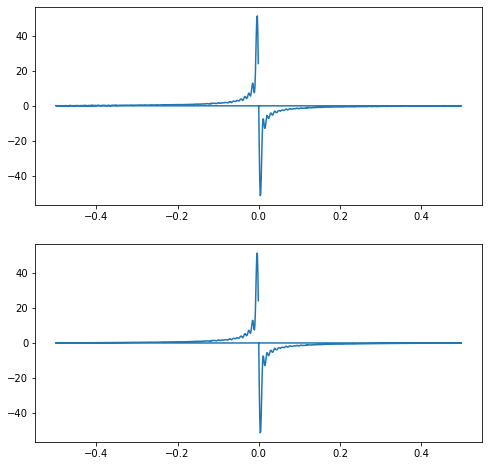

In [2]:
import numpy as np
import matplotlib.colors as mcolor
import scipy.signal as signal

x=np.loadtxt(open(_path+list_csv[29],"rb"),delimiter=",",skiprows=0).T

b,a = signal.butter(8,0.5,'lowpass')
filtedData = signal.filtfilt(b,a,x)
print(type(filtedData))
# fourier transform
ft = np.fft.fft(x)
freq = np.fft.fftfreq(x.shape[-1])
ft2 = np.fft.fft(filtedData)
freq2 = np.fft.fftfreq(filtedData.shape[-1])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(freq,ft.imag)
plt.subplot(212)
plt.plot(freq2,ft2.imag)
'''
print(ft.imag.shape)
ft=ft.imag.reshape(1,-1)
ft2=ft2.imag.reshape(1,-1)

gasf = gaf(image_size=ft.shape[1],method='summation')
X_gasf = gasf.fit_transform(ft2)
plt.subplot(413)
plt.imshow(X_gasf[0],cmap="CMRmap",origin="lower")

print('MTF')
MTF = mtf(image_size= ft2.shape[1])
X_MTF = MTF.fit_transform(ft2)
plt.subplot(414)
plt.imshow(X_MTF[0],cmap="CMRmap",origin="lower")
'''
plt.show()

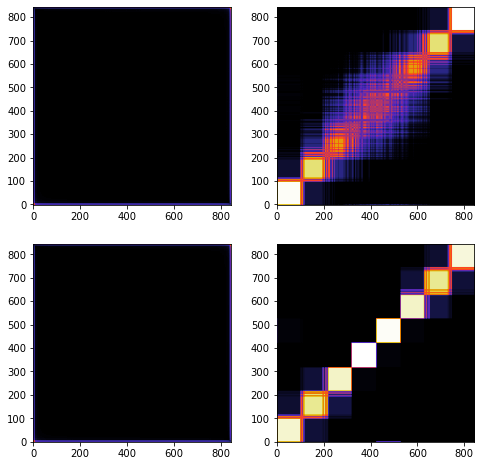

In [3]:
ft=ft.imag.reshape(1,-1)
ft2=ft2.imag.reshape(1,-1)
plt.figure(figsize=(8,8))
gasf = gaf(image_size=ft.shape[1],method='summation')
X_gasf = gasf.fit_transform(ft)
plt.subplot(221)
plt.imshow(X_gasf[0],cmap="CMRmap",origin="lower")

print('')
MTF = mtf(image_size= ft.shape[1])
X_MTF = MTF.fit_transform(ft)
plt.subplot(222)
plt.imshow(X_MTF[0],cmap="CMRmap",origin="lower")

gasf2 = gaf(image_size=ft2.shape[1],method='summation')
X_gasf2 = gasf.fit_transform(ft2)
plt.subplot(223)
plt.imshow(X_gasf2[0],cmap="CMRmap",origin="lower")

MTF2 = mtf(image_size= ft2.shape[1])
X_MTF2 = MTF.fit_transform(ft2)
plt.subplot(224)
plt.imshow(X_MTF2[0],cmap="CMRmap",origin="lower")

plt.show()